In [32]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv("../COVID19_data_PAPER_VERSION.csv",sep=';')
data["Date"] = pd.to_datetime(data["Date"])

In [4]:
data.query("Country=='Austria' and Date>=@pd.Timestamp(2020,3,1) and Date<@pd.Timestamp(2020,4,30)").head(5)

,Country,Date,Population [million],Population Density,GDP pc PPP,HDI,VA,PS,GE,RQ,...,Travel restriction -- Cordon sanitaire,Travel restriction -- Individual movement restrictions,Travel restriction -- National lockdown,Travel restriction -- Port and ship restriction,Travel restriction -- Public transport restriction,Confirmed,Deaths,Recovered,Growth rate,R
335,Austria,2020-03-01,8.9,106.0,55455.0,0.914,1.38,0.92,1.45,1.54,...,False,False,False,False,False,14.0,0.0,0.0,0.372250,NaN
336,Austria,2020-03-02,8.9,106.0,55455.0,0.914,1.38,0.92,1.45,1.54,...,False,False,False,False,False,18.0,0.0,0.0,0.333769,NaN
337,Austria,2020-03-03,8.9,106.0,55455.0,0.914,1.38,0.92,1.45,1.54,...,False,False,False,False,False,21.0,0.0,0.0,0.311393,NaN
338,Austria,2020-03-04,8.9,106.0,55455.0,0.914,1.38,0.92,1.45,1.54,...,False,False,False,False,False,29.0,0.0,0.0,0.305791,NaN
339,Austria,2020-03-05,8.9,106.0,55455.0,0.914,1.38,0.92,1.45,1.54,...,False,False,False,False,False,41.0,0.0,0.0,0.305874,NaN


In [41]:
data.Country.unique()

array(['Albania', 'Austria', 'Belgium', 'Bosnia and Herzegovina',
       'Brazil', 'Canada', 'China', 'Croatia', 'Czechia', 'Denmark',
       'Ecuador', 'El Salvador', 'Estonia', 'Finland', 'France',
       'Germany', 'Ghana', 'Greece', 'Honduras', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Ireland', 'Italy', 'Japan', 'Kazakhstan',
       'Korea, South', 'Kosovo', 'Kuwait', 'Liechtenstein', 'Lithuania',
       'Malaysia', 'Mauritius', 'Mexico', 'Montenegro', 'Netherlands',
       'New Zealand', 'North Macedonia', 'Norway', 'Poland', 'Portugal',
       'Romania', 'Senegal', 'Serbia', 'Singapore', 'Slovakia',
       'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Syria', 'Taiwan*',
       'Thailand', 'US - Alabama', 'US - Alaska', 'US - Arizona',
       'US - California', 'US - Colorado', 'US - Connecticut',
       'US - Delaware', 'US - Florida', 'US - Georgia', 'US - Hawaii',
       'US - Idaho', 'US - Illinois', 'US - Indiana', 'US - Iowa',
       'US - Kansas', 'US - Kentucky

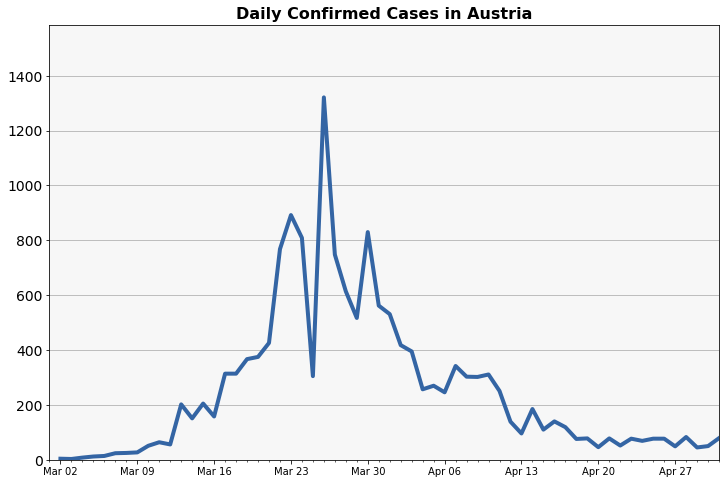

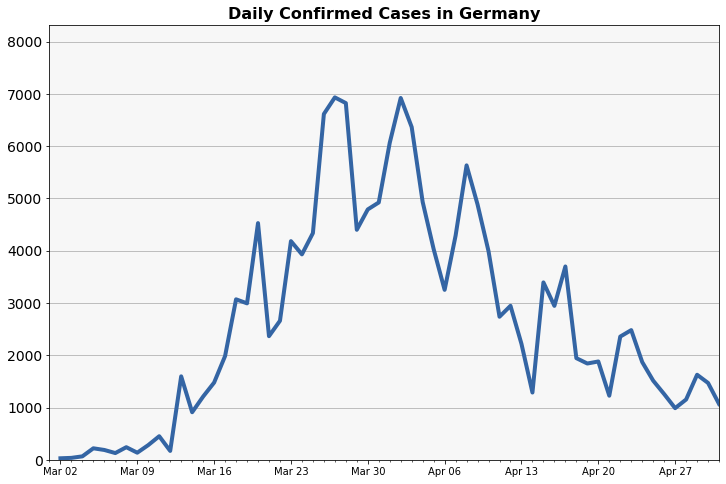

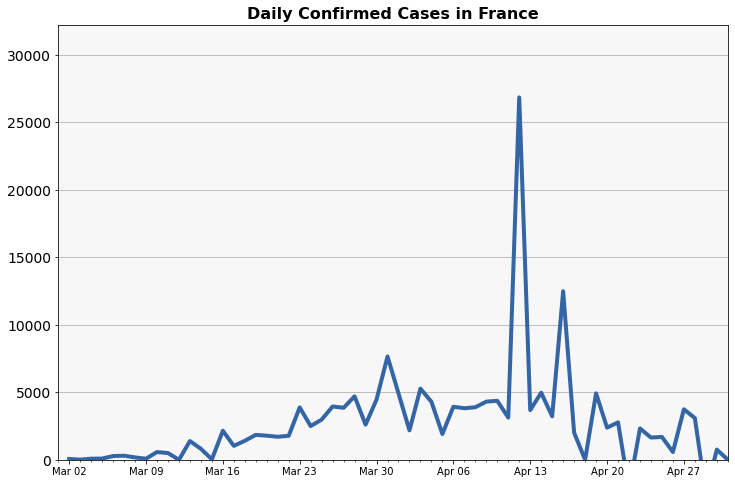

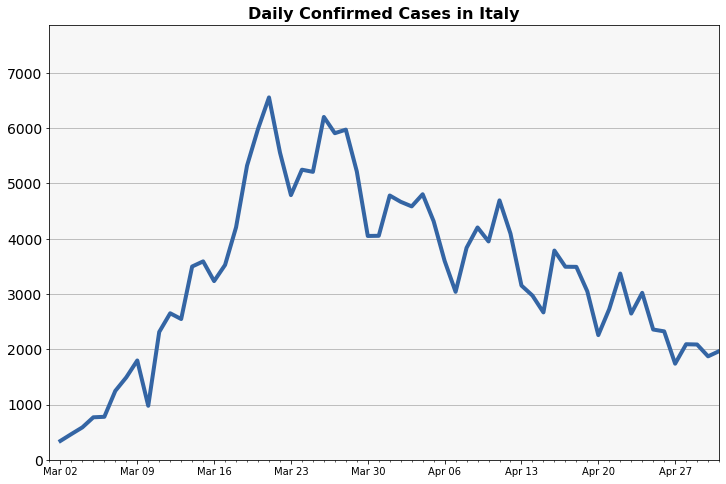

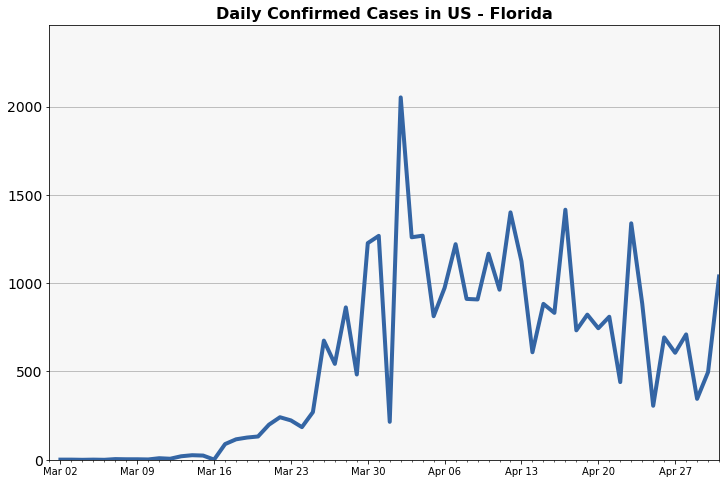

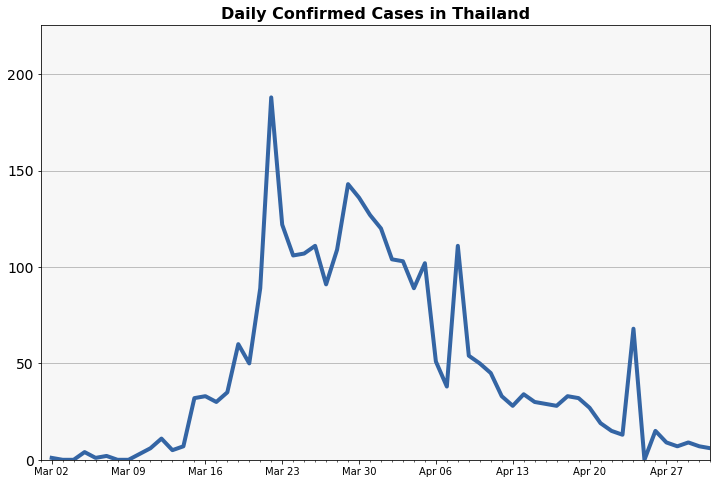

In [50]:
special_countries = ['Austria', 'Germany', 'France', 'Italy', 'US - Florida', 'Thailand']

for country in special_countries:

    plotdata  = data.query("Country=='{}'".format(country)).set_index("Date").loc["2020-3-1":"2020-05-01"]
    plotdata  = plotdata.set_index(pd.date_range("2020-03-1","2020-05-01",freq="D")).Confirmed.diff().dropna()
    plotdata.plot(linewidth=4,figsize=(12,8),color='#3465a4')
    confirmed_max = np.max(plotdata.values)
    ax = plt.gca()
    plt.grid(axis='y')
    plt.title("Daily Confirmed Cases in {}".format(country),fontsize=16, weight = 'bold')
    #plt.xlabel("Date",fontsize=16)
    ticks_time = pd.date_range("2020-03-1","2020-05-01",freq="W-MON")
    ticks_label = [x.strftime('%b %d') for x in ticks_time]

    plt.xticks(ticks_time, ticks_label)
    ax.tick_params(axis="y",labelsize=14)
    ax.tick_params(axis="x",which='major',labelsize=10)
    ax.tick_params(axis="x",which='minor',labelsize=0)
    ax.set_facecolor([.97,.97,.97])
    #ax.plot([pd.Timestamp(2020,3,10),pd.Timestamp(2020,3,10)],[0,1500],color="grey",linestyle="dashed")
    #ax.plot([pd.Timestamp(2020,3,15),pd.Timestamp(2020,3,15)],[0,1500],color="grey",linestyle="dashed")
    plt.axis(ymin=0,ymax=1.2 * confirmed_max,xmin=pd.Timestamp(2020,3,1))
    plt.savefig("cov_cases_{}.png".format(country),bbox_inches="tight",pad_inches=.3)
    plt.savefig("cov_cases_{}.pdf".format(country),bbox_inches="tight",pad_inches=.3)
    plt.show()

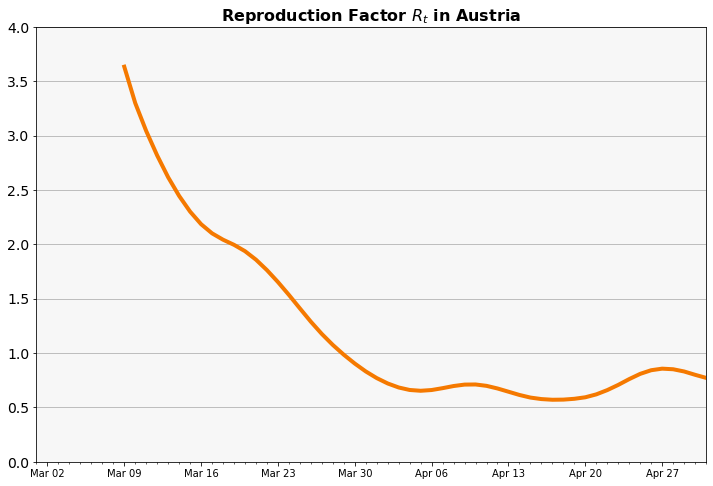

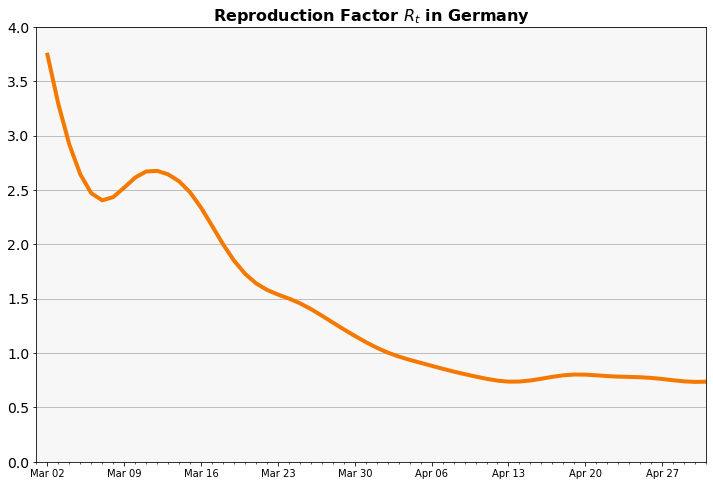

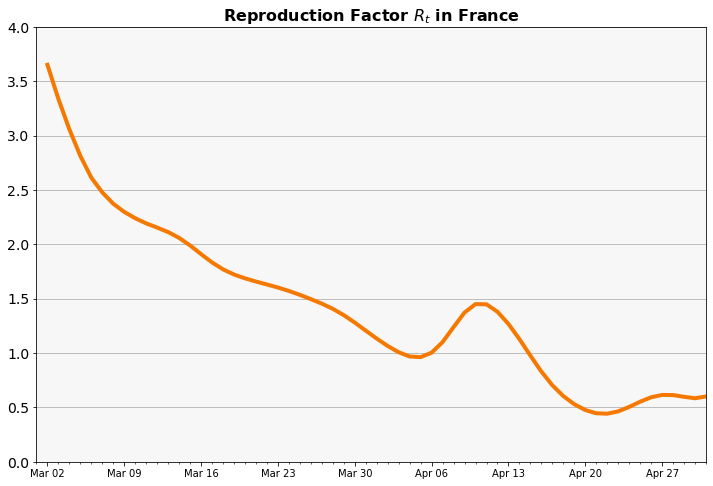

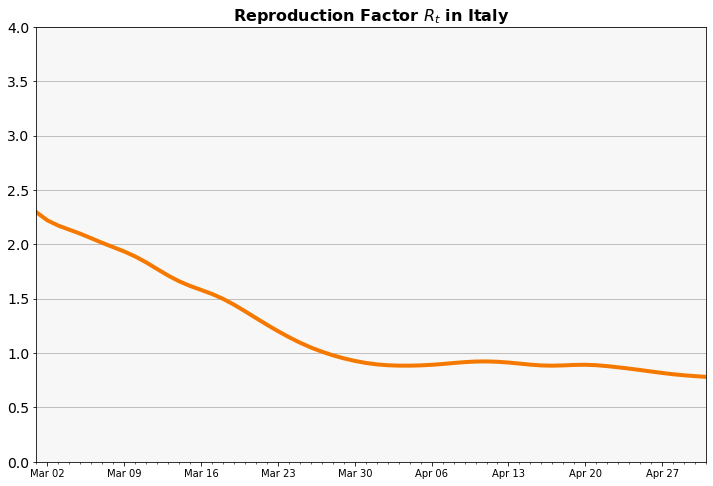

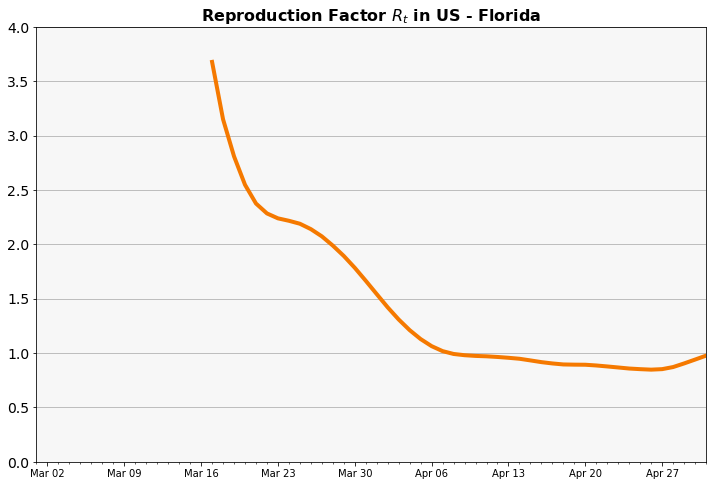

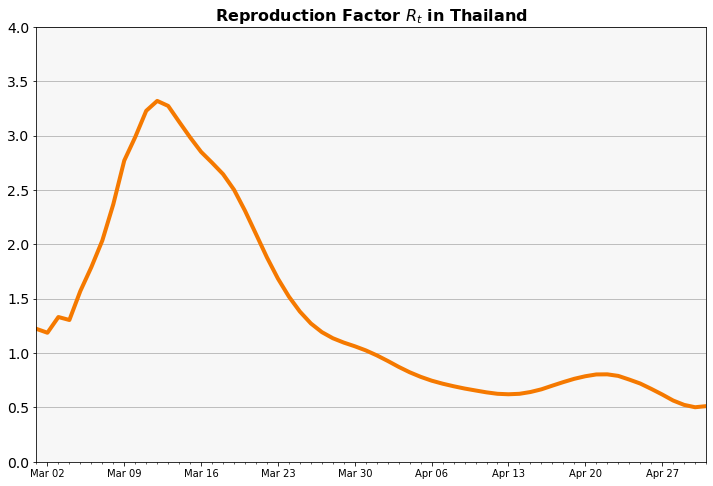

In [49]:
for country in special_countries:

    plotdata  = data.query("Country=='{}'".format(country)).set_index("Date").loc["2020-3-1":"2020-05-01"]
    plotdata  = plotdata.set_index(pd.date_range("2020-03-1","2020-05-01",freq="D")).R.dropna()
    plotdata.plot(linewidth=4,figsize=(12,8),color='#f57900')
    confirmed_max = np.max(plotdata.values)
    ax = plt.gca()
    plt.grid(axis='y')
    plt.title(r"Reproduction Factor $R_t$ in {}".format(country),fontsize=16, weight = 'bold')
    #plt.xlabel("Date",fontsize=16)
    ticks_time = pd.date_range("2020-03-1","2020-05-01",freq="W-MON")
    ticks_label = [x.strftime('%b %d') for x in ticks_time]

    plt.xticks(ticks_time, ticks_label)
    ax.tick_params(axis="y",labelsize=14)
    ax.tick_params(axis="x",which='major',labelsize=10)
    ax.tick_params(axis="x",which='minor',labelsize=0)
    ax.set_facecolor([.97,.97,.97])
    #ax.plot([pd.Timestamp(2020,3,10),pd.Timestamp(2020,3,10)],[0,1500],color="grey",linestyle="dashed")
    #ax.plot([pd.Timestamp(2020,3,15),pd.Timestamp(2020,3,15)],[0,1500],color="grey",linestyle="dashed")
    plt.axis(ymin=0,ymax=4,xmin=pd.Timestamp(2020,3,1))
    plt.savefig("cov_Rt_{}.png".format(country),bbox_inches="tight",pad_inches=.3)
    plt.savefig("cov_Rt_{}.pdf".format(country),bbox_inches="tight",pad_inches=.3)
    plt.show()